# Functional Encryption - Classification and information leakage

We have said that we want to work on Function Encryption as explained in the paper [Reading in the Dark: Classifying Encrypted Digits with Functional Encryption](https://eprint.iacr.org/2018/206). This paper makes a very interesting comparison and shows that its Functional Encryption scheme for quadratic multi-variate polynomials is equivalent to single hidden layer neural network with a quadratic activation!

More specifically the second linear function should come with no bias and the width of the intermediary layer should be kept small to preserve efficiency in the encrypted setting. It is set at 40 neurons in the paper.

Let's implement this network with PyTorch and run a first evaluation of the model's performance!

We'll see:
- a basic implementation
- the impact of regularization
- an optimisation by replacing the argmax with extra layers

# 2 Quadratic model improvements


We will now use the code directly from the repo, to make the notebook more readable. Functions are standard for performing `train`, `test` and orchestrate the training with the `main`.

_Note that the task we try to optimize here is the font because improvements given by extending the network are more visible compared to the character recognition whose baseline accuracy already is >99.4%._

In [1]:
# Allow to load packages from parent
import sys, os
sys.path.insert(1, os.path.realpath(os.path.pardir))

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from learn import main, train, test, show_results, show_confusion_matrix

In [3]:
N_OUTPUT = 2

class Parser:
    """Parameters for the training"""
    def __init__(self):
        self.epochs = 40
        self.lr = 0.002
        self.momentum = 0.5
        self.test_batch_size = 1000
        self.batch_size = 64
        self.log_interval = 300

## 2.1 Basic implementation


### 2.1.1 Quadratic model
Here is the quadratic model equivalent to Quadratic Functional Encryption

In [4]:
class QuadNet(nn.Module):
    def __init__(self, output_size):
        super(QuadNet, self).__init__()
        self.proj1 = nn.Linear(784, 40)
        self.diag1 = nn.Linear(40, output_size, bias=None)

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.proj1(x)
        x = x * x
        x = self.diag1(x)
        return F.log_softmax(x, dim=1)

### 2.1.2 Training

Let's train launch the training!

Notice the `task` to specify if we work on character recognition (`char`) or font recognition (`font`)

In [5]:
results = {}
model=QuadNet(N_OUTPUT)
results['QuadNet'], pred_labels = main(
    model=model, 
    args=Parser(),
    task='font',
    return_pred_label=True,
    reg_l2=False
)


Training set 60000 items
Testing set  10000 items
Learning on font 
Train Epoch: 1 [0/60000 (0%)]	Loss: 0.719468
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.317057
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.264033
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.248714

Test set: Average loss: 0.2109, Accuracy: 9157/10000 (91.57%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.160980
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.293187
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.102611
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.203059

Test set: Average loss: 0.1532, Accuracy: 9432/10000 (94.32%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.117752
Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.119851
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.122889
Train Epoch: 3 [57600/60000 (96%)]	Loss: 0.075990

Test set: Average loss: 0.1263, Accuracy: 9570/10000 (95.70%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.120892
Train Epoch: 4 [19200/60000 (32%)]	Loss: 0.054771
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.043726
Train Epoc

Train Epoch: 32 [19200/60000 (32%)]	Loss: 0.052055
Train Epoch: 32 [38400/60000 (64%)]	Loss: 0.034246
Train Epoch: 32 [57600/60000 (96%)]	Loss: 0.030147

Test set: Average loss: 0.0762, Accuracy: 9764/10000 (97.64%)

Train Epoch: 33 [0/60000 (0%)]	Loss: 0.030427
Train Epoch: 33 [19200/60000 (32%)]	Loss: 0.108568
Train Epoch: 33 [38400/60000 (64%)]	Loss: 0.019433
Train Epoch: 33 [57600/60000 (96%)]	Loss: 0.019470

Test set: Average loss: 0.0757, Accuracy: 9781/10000 (97.81%)

Train Epoch: 34 [0/60000 (0%)]	Loss: 0.029818
Train Epoch: 34 [19200/60000 (32%)]	Loss: 0.004257
Train Epoch: 34 [38400/60000 (64%)]	Loss: 0.008645
Train Epoch: 34 [57600/60000 (96%)]	Loss: 0.040206

Test set: Average loss: 0.0715, Accuracy: 9786/10000 (97.86%)

Train Epoch: 35 [0/60000 (0%)]	Loss: 0.015198
Train Epoch: 35 [19200/60000 (32%)]	Loss: 0.009026
Train Epoch: 35 [38400/60000 (64%)]	Loss: 0.091951
Train Epoch: 35 [57600/60000 (96%)]	Loss: 0.005740

Test set: Average loss: 0.0696, Accuracy: 9799/10000 (97.

For the sake of curiosity, let's print the confusion matrix for the base model

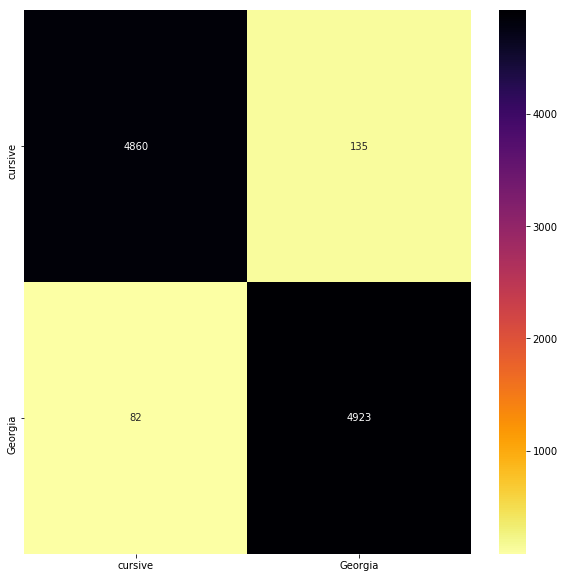

In [6]:
show_confusion_matrix(pred_labels, task='font')

## 2.2 Regularization


In [7]:
results = {}
results['QuadNet'], pred_labels = main(
    model=QuadNet(N_OUTPUT), 
    args=Parser(),
    task='font',
    return_pred_label=True,
    reg_l2=True,
    reg=0.005,
)


Training set 60000 items
Testing set  10000 items
Learning on font and reg_l2
Train Epoch: 1 [0/60000 (0%)]	Loss: 0.819279
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.387368
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.330577
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.283093

Test set: Average loss: 0.2116, Accuracy: 9152/10000 (91.52%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.224554
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.318623
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.206573
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.298528

Test set: Average loss: 0.1565, Accuracy: 9441/10000 (94.41%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.184100
Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.204253
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.231604
Train Epoch: 3 [57600/60000 (96%)]	Loss: 0.135547

Test set: Average loss: 0.1315, Accuracy: 9558/10000 (95.58%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.195498
Train Epoch: 4 [19200/60000 (32%)]	Loss: 0.139618
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.137817


Train Epoch: 32 [19200/60000 (32%)]	Loss: 0.091405
Train Epoch: 32 [38400/60000 (64%)]	Loss: 0.087959
Train Epoch: 32 [57600/60000 (96%)]	Loss: 0.101077

Test set: Average loss: 0.0646, Accuracy: 9781/10000 (97.81%)

Train Epoch: 33 [0/60000 (0%)]	Loss: 0.074424
Train Epoch: 33 [19200/60000 (32%)]	Loss: 0.185871
Train Epoch: 33 [38400/60000 (64%)]	Loss: 0.075974
Train Epoch: 33 [57600/60000 (96%)]	Loss: 0.073974

Test set: Average loss: 0.0679, Accuracy: 9790/10000 (97.90%)

Train Epoch: 34 [0/60000 (0%)]	Loss: 0.103279
Train Epoch: 34 [19200/60000 (32%)]	Loss: 0.067313
Train Epoch: 34 [38400/60000 (64%)]	Loss: 0.074826
Train Epoch: 34 [57600/60000 (96%)]	Loss: 0.107736

Test set: Average loss: 0.0665, Accuracy: 9783/10000 (97.83%)

Train Epoch: 35 [0/60000 (0%)]	Loss: 0.092432
Train Epoch: 35 [19200/60000 (32%)]	Loss: 0.070287
Train Epoch: 35 [38400/60000 (64%)]	Loss: 0.196111
Train Epoch: 35 [57600/60000 (96%)]	Loss: 0.078212

Test set: Average loss: 0.0635, Accuracy: 9781/10000 (97.

Regularisation helps a little bit to improve accuracy, however the reason will keep it (it enabled by defult in the main function) is because it makes the weights a bit smaller, which is crucial for Functional Encryption.

If you wonder why, here is a 1-line explication: each number of the output comes as g ** x (where g is a field element) and must be decrypted to find x, the real output of the network. The weights will be converted to integers, and the higher x is the more complicated it is to do the computation g ** x -> x, called the _discrete log_.

## 2.3 Extend the network

We now replace the argmax operation (and the log_softmax) with extra layers to get a deeper network. This has no consequences on the security of the first layers which remain the only one to contain encrypted data.

### 2.3.1 Quadratic + Linear 1
Here we try to add linear wider model on top of the input, which consists or 2 linear units and 2 relu activations.

In [8]:
class QuadLinear1Net(nn.Module):
    def __init__(self, output_size):
        super(QuadLinear1Net, self).__init__()
        self.proj1 = nn.Linear(784, 50)
        self.diag1 = nn.Linear(50, output_size)
        
        # --- Linear
        self.lin1 = nn.Linear(output_size, 4*output_size)
        self.lin2 = nn.Linear(4*output_size, output_size)

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.proj1(x)
        x = x * x
        x = self.diag1(x)
        
        # --- Linear
        x = F.relu(x)
        x = F.relu(self.lin1(x))
        x = self.lin2(x)
        
        return F.log_softmax(x, dim=1)

In [9]:
results[f'QuadNet + Linear1'] = main(
    model=QuadLinear1Net(N_OUTPUT), 
    args=Parser(),
    task='font'
)

Training set 60000 items
Testing set  10000 items
Learning on font 
Train Epoch: 1 [0/60000 (0%)]	Loss: 0.720666
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.665429
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.531597
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.458515

Test set: Average loss: 0.4442, Accuracy: 8332/10000 (83.32%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.445453
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.291766
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.200965
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.246472

Test set: Average loss: 0.2059, Accuracy: 9175/10000 (91.75%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.185060
Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.179830
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.175115
Train Epoch: 3 [57600/60000 (96%)]	Loss: 0.097388

Test set: Average loss: 0.1483, Accuracy: 9463/10000 (94.63%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.146960
Train Epoch: 4 [19200/60000 (32%)]	Loss: 0.082636
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.075604
Train Epoc

Train Epoch: 32 [19200/60000 (32%)]	Loss: 0.010360
Train Epoch: 32 [38400/60000 (64%)]	Loss: 0.012992
Train Epoch: 32 [57600/60000 (96%)]	Loss: 0.045682

Test set: Average loss: 0.0696, Accuracy: 9799/10000 (97.99%)

Train Epoch: 33 [0/60000 (0%)]	Loss: 0.007786
Train Epoch: 33 [19200/60000 (32%)]	Loss: 0.053814
Train Epoch: 33 [38400/60000 (64%)]	Loss: 0.005484
Train Epoch: 33 [57600/60000 (96%)]	Loss: 0.012028

Test set: Average loss: 0.0741, Accuracy: 9786/10000 (97.86%)

Train Epoch: 34 [0/60000 (0%)]	Loss: 0.030342
Train Epoch: 34 [19200/60000 (32%)]	Loss: 0.011802
Train Epoch: 34 [38400/60000 (64%)]	Loss: 0.004890
Train Epoch: 34 [57600/60000 (96%)]	Loss: 0.011228

Test set: Average loss: 0.0732, Accuracy: 9788/10000 (97.88%)

Train Epoch: 35 [0/60000 (0%)]	Loss: 0.007350
Train Epoch: 35 [19200/60000 (32%)]	Loss: 0.019515
Train Epoch: 35 [38400/60000 (64%)]	Loss: 0.151375
Train Epoch: 35 [57600/60000 (96%)]	Loss: 0.002406

Test set: Average loss: 0.0673, Accuracy: 9814/10000 (98.

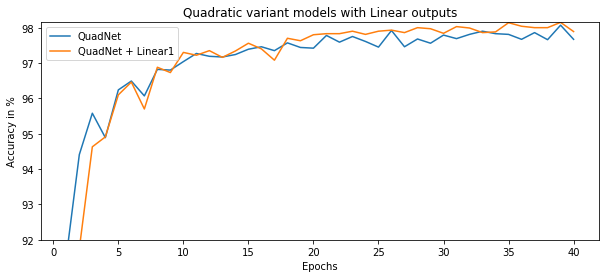

In [10]:
show_results(results, 'Quadratic variant models with Linear outputs', ymin=92)

### 2.3.2 Quadratic + Linear2
Let's try to a bigger Linear model which performs quite well on MNIST too

In [11]:
class QuadLinear2Net(nn.Module):
    def __init__(self, output_size):
        super(QuadLinear2Net, self).__init__()
        self.proj1 = nn.Linear(784, 50)
        self.diag1 = nn.Linear(50, output_size)
        
        # --- Junction
        self.jct = nn.Linear(output_size, 784)
        
        # --- Linear 2
        self.fc1 = nn.Linear(784, 548)
        self.bc1 = nn.BatchNorm1d(548)
        
        self.fc2 = nn.Linear(548, 252)
        self.bc2 = nn.BatchNorm1d(252)
        
        self.fc3 = nn.Linear(252, output_size)
        

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.proj1(x)
        x = x * x
        x = self.diag1(x)
        
        # --- Junction
        x = self.jct(x)
        x = x.view((-1, 784))
        
        # --- Linear
        h = self.fc1(x)
        h = self.bc1(h)
        h = F.relu(h)
        h = F.dropout(h, p=0.5, training=self.training)
        
        h = self.fc2(h)
        h = self.bc2(h)
        h = F.relu(h)
        h = F.dropout(h, p=0.2, training=self.training)
        
        h = self.fc3(h)
        
        return F.log_softmax(x, dim=1)

In [12]:
results[f'QuadNet + Linear2'] = main(
    model=QuadLinear2Net(N_OUTPUT),
    args=Parser(),
    task='font'
)


Training set 60000 items
Testing set  10000 items
Learning on font 
Train Epoch: 1 [0/60000 (0%)]	Loss: 7.243496
Train Epoch: 1 [19200/60000 (32%)]	Loss: 3.338873
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.240132
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.201158

Test set: Average loss: 0.2110, Accuracy: 9157/10000 (91.57%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.177697
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.107242
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.249957
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.098987

Test set: Average loss: 0.1523, Accuracy: 9422/10000 (94.22%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.331209
Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.175291
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.165335
Train Epoch: 3 [57600/60000 (96%)]	Loss: 0.058510

Test set: Average loss: 0.1244, Accuracy: 9554/10000 (95.54%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.054130
Train Epoch: 4 [19200/60000 (32%)]	Loss: 0.062530
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.097115
Train Epoc

Train Epoch: 32 [19200/60000 (32%)]	Loss: 0.001255
Train Epoch: 32 [38400/60000 (64%)]	Loss: 0.016321
Train Epoch: 32 [57600/60000 (96%)]	Loss: 0.017591

Test set: Average loss: 0.0741, Accuracy: 9795/10000 (97.95%)

Train Epoch: 33 [0/60000 (0%)]	Loss: 0.019762
Train Epoch: 33 [19200/60000 (32%)]	Loss: 0.007528
Train Epoch: 33 [38400/60000 (64%)]	Loss: 0.011752
Train Epoch: 33 [57600/60000 (96%)]	Loss: 0.007005

Test set: Average loss: 0.0755, Accuracy: 9801/10000 (98.01%)

Train Epoch: 34 [0/60000 (0%)]	Loss: 0.008116
Train Epoch: 34 [19200/60000 (32%)]	Loss: 0.012971
Train Epoch: 34 [38400/60000 (64%)]	Loss: 0.013181
Train Epoch: 34 [57600/60000 (96%)]	Loss: 0.007892

Test set: Average loss: 0.0737, Accuracy: 9813/10000 (98.13%)

Train Epoch: 35 [0/60000 (0%)]	Loss: 0.004402
Train Epoch: 35 [19200/60000 (32%)]	Loss: 0.046030
Train Epoch: 35 [38400/60000 (64%)]	Loss: 0.003948
Train Epoch: 35 [57600/60000 (96%)]	Loss: 0.009754

Test set: Average loss: 0.0753, Accuracy: 9815/10000 (98.

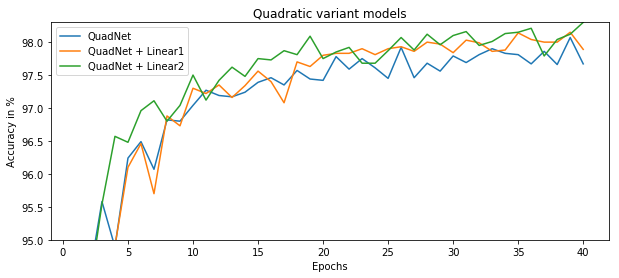

In [13]:
show_results(results, 'Quadratic variant models', ymin=95)

Here the accuracy is alread very good so the improvement is very limited, but on average with Linear2 we achieve better results.

### 2.3.2  Quadratic + Conv1
Here we try to add a CNN wider model on top of the input, which consists of the CNN block used previously and which is provided in the [official Pytorch tutorial on MNIST](https://github.com/pytorch/examples/blob/master/mnist/main.py).

In [14]:
class Parser:
    """Parameters for the training"""
    def __init__(self):
        self.epochs = 10
        self.lr = 0.002
        self.momentum = 0.5
        self.test_batch_size = 1000
        self.batch_size = 64
        self.log_interval = 300

In [15]:
class QuadConv1Net(nn.Module):
    def __init__(self, output_size):
        super(QuadConv1Net, self).__init__()
        self.proj1 = nn.Linear(784, 50)
        self.diag1 = nn.Linear(50, output_size)
        
        # --- Junction
        self.jct = nn.Linear(output_size, 784)
        
        # --- CNN
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, output_size)

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.proj1(x)
        x = x * x
        x = self.diag1(x)
        
        # --- Junction
        x = self.jct(x)
        x = x.view(-1, 1, 28, 28)
        
        # --- CNN
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [16]:
args = Parser()
args.epochs = 30

results['QuadNet + Conv1'] = main(
    model=QuadConv1Net(N_OUTPUT),
    args=args, 
    task='font'
)


Training set 60000 items
Testing set  10000 items
Learning on font 
Train Epoch: 1 [0/60000 (0%)]	Loss: 0.697213
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.691049
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.600323
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.346761

Test set: Average loss: 0.3493, Accuracy: 8608/10000 (86.08%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.299339
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.246099
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.086101
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.225254

Test set: Average loss: 0.1472, Accuracy: 9463/10000 (94.63%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.075447
Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.139381
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.115160
Train Epoch: 3 [57600/60000 (96%)]	Loss: 0.068264

Test set: Average loss: 0.1109, Accuracy: 9617/10000 (96.17%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.175119
Train Epoch: 4 [19200/60000 (32%)]	Loss: 0.050371
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.069492
Train Epoc

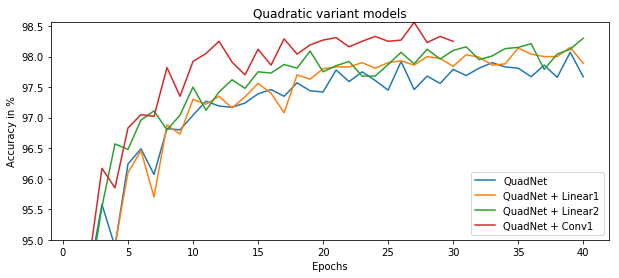

In [17]:
show_results(results, 'Quadratic variant models', ymin=95)

The CNN configuration really outperforms the linear ones, which we could have expected because the CNN alone is doing really good on the MNIST official example. What's interesting is that it managed to exploit the private quadratic model to leverage its 10 bits output and still achieve a very good performance.

## Conclusion

This shows as a conclusion that we can expect some improvements on the global accuracy if we use a public network to leverage (and optimize) the output of the private quadratic network.


### If you like it, star it!

The easiest way to show support is just by starring the Repos! This helps raise awareness on this topics and is a precious feedback for the repo maintainers!

- [Star the Repo](https://github.com/LaRiffle/collateral-learning)